Este notebook tem como objetivo implementar, em python, o exercício 6 do capítulo 2 da disciplina de Princípios de Sistemas de Comunicação.

O objetivo é utilizar técnicas de modulação em aplitude para implmentar um sistema que embaralha um sinal de áudio e também recupera um sinal de áudio embaralhado, conforme o enunciado em anexo nessa pasta [enunciado.png].


In [41]:
#importando o as bilbiotecas
import numpy as np
from scipy.io import wavfile
from scipy.signal import resample
import matplotlib.pyplot as plt
from os import path
from utils import embaralhamento, plot_espectro
from scipy.io.wavfile import write
import time

In [42]:
#lendo e convertendo para numpy
input_wav_file = 'voz_equalizada.wav'
try:
    fs_orig, audio_orig = wavfile.read(input_wav_file)
except FileNotFoundError:
    print(f"ERRO: Arquivo '{input_wav_file}' não encontrado.")
    exit()

In [43]:
#pré processamento:
#transformando para mono:
audio_orig = audio_orig[:, 0] 
#normalizando:
audio_orig = audio_orig / np.max(np.abs(audio_orig))
#reamostrando para poder trabalhar em frequências mais altas, evitando o aliasing:
fs_new = 96000
audio_resampled = resample(audio_orig, int(len(audio_orig) * fs_new / fs_orig))

Com o áudio carregado e pré-processado, podemos passá-lo pelo sistema:

In [44]:
audio_embaralhado, x1, x2, x3 = embaralhamento(audio_resampled, fs_new)

Vamos analisar os espectros e reproduzir os audios original e o embaralhado. 

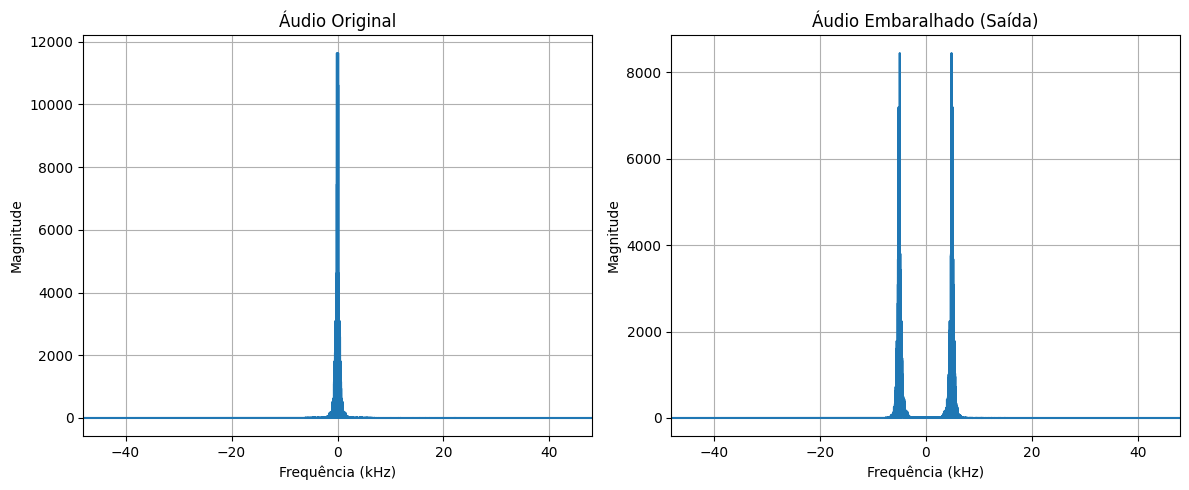

In [45]:
# Plota apenas o espectro do áudio original e do áudio embaralhado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_espectro(audio_resampled, fs_new, 'Áudio Original', axs[0])
plot_espectro(audio_embaralhado, fs_new, 'Áudio Embaralhado (Saída)', axs[1])

plt.tight_layout()
plt.show()

write('audio_embaralhado.wav', fs_new, (audio_embaralhado * 32767).astype('int16'))

Agora, vamos analizar o áudio embaralhado novamente pelo sistema:

In [46]:
audio_desembaralhado, x4, x5, x6 = embaralhamento(audio_embaralhado, fs_new)

Vizualização do espectro do áudio original x passou pelo sistema duas vezes:

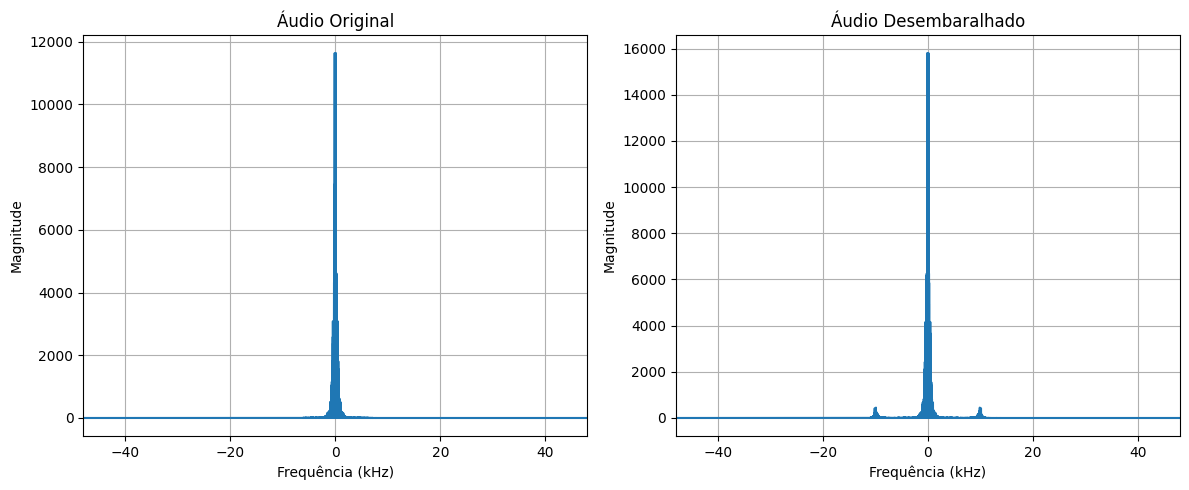

In [47]:
# Plota apenas o espectro do áudio original e do áudio embaralhado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_espectro(audio_resampled, fs_new, 'Áudio Original', axs[0])
plot_espectro(audio_desembaralhado, fs_new, 'Áudio Desembaralhado', axs[1])

write('audio_desembaralhado.wav', fs_new, (audio_desembaralhado * 32767).astype('int16'))
plt.tight_layout()
plt.show()